In [1]:
import numpy as  np
import pandas as pd
import datetime
import time
import tzlocal
import matplotlib.pyplot as plt

import hashlib
import hmac
import urllib.request
import json
import matplotlib.dates as mdates

from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce

import re
import os

In [39]:
# function to load wunderground data (without this it has no records to show)
def render_page(url):
    driver = webdriver.Chrome('C:/Users/jvisser/Downloads/chromedriver_win32/chromedriver')
    driver.get(url)
    time.sleep(3)
    r = driver.page_source
    driver.quit()
    return r

In [40]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))

            r = render_page(url)

            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output

In [51]:
dates = ['2023-1','2023-2']
page = 'https://www.wunderground.com/history/monthly/us/nv/reno/KRNO/date/'
df_output_feb2023 = scraper(page,dates)

C:\Users\jvisser\AppData\Local\Temp\ipykernel_27260\2536237426.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/jvisser/Downloads/chromedriver_win32/chromedriver')


2023-1 finished!
Data not in normal length
Scraper done!


In [94]:
df_output_feb2023

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation,Date
0,35,32.3,24,32,27.3,20,96,82.5,64,15,5.5,0,25.5,25.4,25.3,2.26,2023-1-1
1,28,24.1,16,25,20.3,13,100,85.6,75,6,2.8,0,25.5,25.4,25.3,0.01,2023-1-2
2,34,24.4,18,25,20.8,15,96,86.3,70,12,1.6,0,25.6,25.5,25.4,0.05,2023-1-3
3,37,28.9,19,30,25.2,16,92,85.9,72,7,2.3,0,25.6,25.4,25.3,0.00,2023-1-4
4,43,38.9,35,35,33.1,30,93,80.1,62,20,8.3,0,25.6,25.4,25.2,0.21,2023-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,48,33.6,23,25,21.7,18,85,64.3,34,10,2.2,0,25.9,25.7,25.6,0.00,2023-2-27
27,47,33.4,23,23,20.8,18,81,62.1,33,7,1.7,0,25.6,25.5,25.4,0.00,2023-2-28
28,32,27.3,17,27,19.2,8,93,72.1,51,16,6.4,0,25.6,25.4,25.3,0.00,2023-2-29
29,25,15.8,6,10,5.7,2,84,65.5,48,10,3.6,0,25.8,25.7,25.6,0.19,2023-2-30


,0
0,2017-02-28


In [95]:
data_with_index = df_output_feb2023.set_index("Date")

df_feb2023 = data_with_index.drop(labels=['2023-1-1', '2023-1-2', '2023-1-3', '2023-1-4','2023-1-5', '2023-1-6', '2023-1-7', '2023-1-8', \
               '2023-1-9', '2023-1-10', '2023-1-11', '2023-1-12', '2023-1-13', '2023-1-14', '2023-1-15', '2023-1-16', \
               '2023-1-17', '2023-1-18', '2023-1-19', '2023-1-20', \
               '2023-1-21', '2023-1-22', '2023-1-23', '2023-1-24', \
               '2023-1-25', '2023-1-26', '2023-1-27', '2023-1-28', \
               '2023-1-29', '2023-1-30', '2023-1-31', '2023-2-21', \
               '2023-2-22', '2023-2-23', '2023-2-24', '2023-2-25', \
               '2023-2-26', '2023-2-27', '2023-2-28', '2023-2-29', \
               '2023-2-30', '2023-2-31'], axis=0)

In [96]:
df_feb2023

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation
Date,,,,,,,,,,,,,,,,
2023-2-1,35,32.3,24,32,27.3,20,96,82.5,64,15,5.5,0,25.5,25.4,25.3,2.26
2023-2-2,28,24.1,16,25,20.3,13,100,85.6,75,6,2.8,0,25.5,25.4,25.3,0.01
2023-2-3,34,24.4,18,25,20.8,15,96,86.3,70,12,1.6,0,25.6,25.5,25.4,0.05
2023-2-4,37,28.9,19,30,25.2,16,92,85.9,72,7,2.3,0,25.6,25.4,25.3,0.00
2023-2-5,43,38.9,35,35,33.1,30,93,80.1,62,20,8.3,0,25.6,25.4,25.2,0.21
2023-2-6,40,33.6,28,28,23.2,20,79,66.5,47,13,2.5,0,25.8,25.7,25.6,0.03
2023-2-7,45,36.0,26,28,25.3,22,89,67.3,47,24,6.5,0,25.6,25.5,25.4,0.00
2023-2-8,46,40.6,34,34,27.5,19,87,61.5,36,22,9.3,0,25.5,25.4,25.3,0.02
2023-2-9,44,39.9,32,39,33.8,26,93,79.3,60,20,6.7,0,25.4,25.3,25.2,0.21


In [77]:
from datetime import datetime, timedelta
  
startDate = datetime(2017, 1, 1)
endDate = datetime(2017, 2, 28)
  
# Getting List of Days using pandas
datesRange = pd.date_range(startDate,endDate-timedelta(days=1),freq='d')
print(datesRange);

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
      

In [11]:
#, end_date = "2017-03-01", "2023-02-01"
 
#month_list = pd.period_range(start=start_date, end=end_date, freq='M')
#month_list = [month.strftime("%Y-%m") for month in month_list]
 
#print(f"Months that lie between '{start_date}' and '{end_date}' are: ")
#print(*month_list, sep=", ")
#print(f"Total months: {len(month_list)}")


Months that lie between '2017-03-01' and '2023-02-01' are: 
2017-03, 2017-04, 2017-05, 2017-06, 2017-07, 2017-08, 2017-09, 2017-10, 2017-11, 2017-12, 2018-01, 2018-02, 2018-03, 2018-04, 2018-05, 2018-06, 2018-07, 2018-08, 2018-09, 2018-10, 2018-11, 2018-12, 2019-01, 2019-02, 2019-03, 2019-04, 2019-05, 2019-06, 2019-07, 2019-08, 2019-09, 2019-10, 2019-11, 2019-12, 2020-01, 2020-02, 2020-03, 2020-04, 2020-05, 2020-06, 2020-07, 2020-08, 2020-09, 2020-10, 2020-11, 2020-12, 2021-01, 2021-02, 2021-03, 2021-04, 2021-05, 2021-06, 2021-07, 2021-08, 2021-09, 2021-10, 2021-11, 2021-12, 2022-01, 2022-02, 2022-03, 2022-04, 2022-05, 2022-06, 2022-07, 2022-08, 2022-09, 2022-10, 2022-11, 2022-12, 2023-01, 2023-02
Total months: 72


In [97]:
df_output

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation,Date
0,53,37.0,24,24,19.5,15,71,51.9,27,8,3.5,0,25.9,25.9,25.8,0.00,2017-3-1
1,57,40.7,25,26,22.9,20,81,52.7,27,9,2.1,0,25.9,25.8,25.7,0.00,2017-3-2
2,57,43.0,28,25,17.3,5,79,43.1,14,9,2.7,0,25.8,25.6,25.5,0.00,2017-3-3
3,56,44.5,32,32,19.0,11,79,39.4,18,36,17.1,0,25.4,25.3,25.2,0.00,2017-3-4
4,37,30.8,27,34,24.3,11,96,78.1,42,25,11.7,0,25.4,25.2,25.2,0.18,2017-3-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,48,33.6,23,25,21.7,18,85,64.3,34,10,2.2,0,25.9,25.7,25.6,0.00,2023-1-27
27,47,33.4,23,23,20.8,18,81,62.1,33,7,1.7,0,25.6,25.5,25.4,0.00,2023-1-28
28,32,27.3,17,27,19.2,8,93,72.1,51,16,6.4,0,25.6,25.4,25.3,0.00,2023-1-29
29,25,15.8,6,10,5.7,2,84,65.5,48,10,3.6,0,25.8,25.7,25.6,0.19,2023-1-30


In [49]:
dates = ['2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8', '2017-9', '2017-10', '2017-11', '2017-12', \
         '2018-1', '2018-2', '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12', \
         '2019-1', '2019-2', '2019-3', '2019-4', '2019-5', '2019-6', '2019-7', '2019-8', '2019-9', '2019-10', '2019-11', '2019-12', \
         '2020-1', '2020-2', '2020-3', '2020-4', '2020-5', '2020-6', '2020-7', '2020-8', '2020-9', '2020-10', '2020-11', '2020-12', \
         '2021-1', '2021-2', '2021-3', '2021-4', '2021-5', '2021-6', '2021-7', '2021-8', '2021-9', '2021-10', '2021-11', '2021-12', \
         '2022-1', '2022-2', '2022-3', '2022-4', '2022-5', '2022-6', '2022-7', '2022-8', '2022-9', '2022-10', '2022-11', '2022-12', \
         '2023-1']
page = 'https://www.wunderground.com/history/monthly/us/nv/reno/KRNO/date/'
df_output = scraper(page,dates)

C:\Users\jvisser\AppData\Local\Temp\ipykernel_27260\2536237426.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/jvisser/Downloads/chromedriver_win32/chromedriver')


2017-3 finished!
2017-4 finished!
2017-5 finished!
2017-6 finished!
2017-7 finished!
2017-8 finished!
2017-9 finished!
2017-10 finished!
2017-11 finished!
2017-12 finished!
2018-1 finished!
2018-2 finished!
2018-3 finished!
2018-4 finished!
2018-5 finished!
2018-6 finished!
2018-7 finished!
2018-8 finished!
2018-9 finished!
2018-10 finished!
2018-11 finished!
2018-12 finished!
2019-1 finished!
2019-2 finished!
2019-3 finished!
2019-4 finished!
2019-5 finished!
2019-6 finished!
2019-7 finished!
2019-8 finished!
2019-9 finished!
2019-10 finished!
2019-11 finished!
2019-12 finished!
2020-1 finished!
2020-2 finished!
2020-3 finished!
2020-4 finished!
2020-5 finished!
2020-6 finished!
2020-7 finished!
2020-8 finished!
2020-9 finished!
2020-10 finished!
2020-11 finished!
2020-12 finished!
2021-1 finished!
2021-2 finished!
2021-3 finished!
2021-4 finished!
2021-5 finished!
2021-6 finished!
2021-7 finished!
2021-8 finished!
2021-9 finished!
2021-10 finished!
2021-11 finished!
2021-12 finished!

In [ ]:
df_weather = pd.read_excel(r'Gerlach_weather201723.xlsx', header = 0)

In [99]:
df_output_with_index = df_output.set_index("Date")
df_output_with_index

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation
Date,,,,,,,,,,,,,,,,
2017-3-1,53,37.0,24,24,19.5,15,71,51.9,27,8,3.5,0,25.9,25.9,25.8,0.00
2017-3-2,57,40.7,25,26,22.9,20,81,52.7,27,9,2.1,0,25.9,25.8,25.7,0.00
2017-3-3,57,43.0,28,25,17.3,5,79,43.1,14,9,2.7,0,25.8,25.6,25.5,0.00
2017-3-4,56,44.5,32,32,19.0,11,79,39.4,18,36,17.1,0,25.4,25.3,25.2,0.00
2017-3-5,37,30.8,27,34,24.3,11,96,78.1,42,25,11.7,0,25.4,25.2,25.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-1-27,48,33.6,23,25,21.7,18,85,64.3,34,10,2.2,0,25.9,25.7,25.6,0.00
2023-1-28,47,33.4,23,23,20.8,18,81,62.1,33,7,1.7,0,25.6,25.5,25.4,0.00
2023-1-29,32,27.3,17,27,19.2,8,93,72.1,51,16,6.4,0,25.6,25.4,25.3,0.00


In [102]:
df_all = df_output_with_index.append(df_feb2023)

In [103]:
df_all

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation
Date,,,,,,,,,,,,,,,,
2017-3-1,53,37.0,24,24,19.5,15,71,51.9,27,8,3.5,0,25.9,25.9,25.8,0.00
2017-3-2,57,40.7,25,26,22.9,20,81,52.7,27,9,2.1,0,25.9,25.8,25.7,0.00
2017-3-3,57,43.0,28,25,17.3,5,79,43.1,14,9,2.7,0,25.8,25.6,25.5,0.00
2017-3-4,56,44.5,32,32,19.0,11,79,39.4,18,36,17.1,0,25.4,25.3,25.2,0.00
2017-3-5,37,30.8,27,34,24.3,11,96,78.1,42,25,11.7,0,25.4,25.2,25.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-2-16,36,33.0,31,32,29.7,27,96,87.7,76,12,4.8,0,25.3,25.1,25.1,0.07
2023-2-17,36,29.1,21,28,21.1,15,92,72.5,54,9,4.1,0,25.6,25.5,25.3,0.35
2023-2-18,37,27.4,17,30,19.4,13,88,72.4,56,20,3.7,0,25.6,25.6,25.4,0.00


In [20]:
df_all.to_excel("Gerlach_weather201723.xlsx")

NameError: name 'df_all' is not defined

In [24]:
df_weather = pd.read_excel(r'Gerlach_weather201723.xlsx', header = 0)

In [25]:
df_output_with_index = df_output.set_index("Date")
df_output_with_index

NameError: name 'df_output' is not defined

In [26]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"])

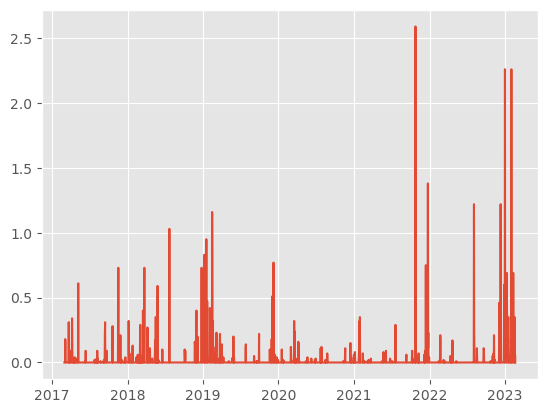

In [27]:
s = pd.Series(df_weather['Precipitation'])
df_weather['Precipitation'] = pd.to_numeric(s, errors='coerce')
#rainfall = df_output['Precipitation'].to_list()
plt.plot(df_weather["Date"] ,df_weather['Precipitation'])
plt.show()

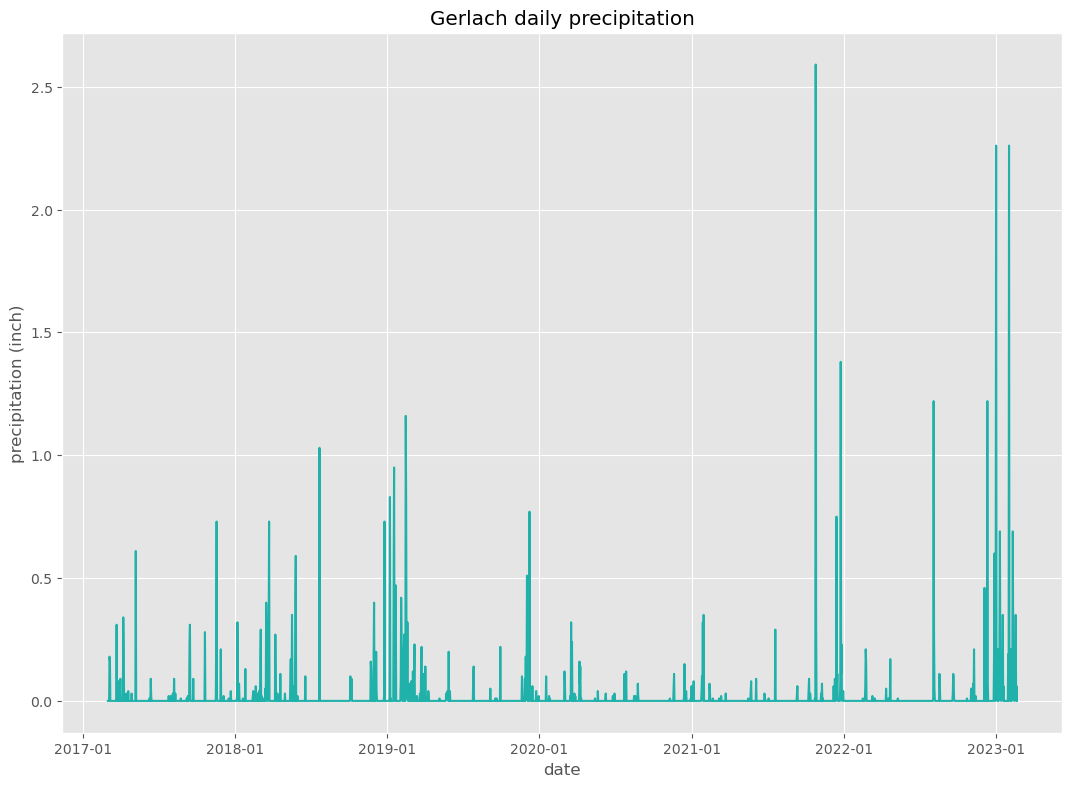

In [28]:
# create a new figure that is 10x7 inches
# which is rendered as 100 pixels per inch
# (matplotlib incorrectly refers to this as dots-per-inch, which is a printer term)
plt.style.use(['ggplot']) # optional: for ggplot-like style
fig = plt.figure(figsize=(10.0, 7.0), dpi=100)

# define axes on the figure to take up the entire figure canvas
ax = fig.add_axes([0, 0, 1, 1])

# plot the rainfall amounts against the axes
ax.plot(df_weather["Date"], df_weather['Precipitation'], color='lightseagreen')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=24))
ax.tick_params(axis='x')

# label the axes and title the plot
ax.set_xlabel('date')
ax.set_ylabel('precipitation (inch)')
ax.set_title('Gerlach daily precipitation')

# save the plot to disk
fig.savefig('daily-precipitation.png', bbox_inches='tight')

In [11]:
index_no = df_weather.columns.get_loc('Precipitation')
index_no

16

In [30]:
s1 = pd.Series(df_weather['Precipitation'])
df_weather['Precipitation'] = pd.to_numeric(s1, errors='coerce')
prec_mm = df_weather['Precipitation']*25.4
#gerlach_precip_dailymm = weatherdata['Rain - mm'].resample('D').sum()
df_weather.insert(loc=17, column='Precipitation - mm', value=prec_mm)

In [31]:
df_weather

,Date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation,Precipitation - mm
0,2017-03-01,53,37.0,24,24,19.5,15,71,51.9,27,8,3.5,0,25.9,25.9,25.8,0.00,0.000
1,2017-03-02,57,40.7,25,26,22.9,20,81,52.7,27,9,2.1,0,25.9,25.8,25.7,0.00,0.000
2,2017-03-03,57,43.0,28,25,17.3,5,79,43.1,14,9,2.7,0,25.8,25.6,25.5,0.00,0.000
3,2017-03-04,56,44.5,32,32,19.0,11,79,39.4,18,36,17.1,0,25.4,25.3,25.2,0.00,0.000
4,2017-03-05,37,30.8,27,34,24.3,11,96,78.1,42,25,11.7,0,25.4,25.2,25.2,0.18,4.572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2023-02-16,36,33.0,31,32,29.7,27,96,87.7,76,12,4.8,0,25.3,25.1,25.1,0.07,1.778
2178,2023-02-17,36,29.1,21,28,21.1,15,92,72.5,54,9,4.1,0,25.6,25.5,25.3,0.35,8.890
2179,2023-02-18,37,27.4,17,30,19.4,13,88,72.4,56,20,3.7,0,25.6,25.6,25.4,0.00,0.000
2180,2023-02-19,34,30.1,18,31,21.9,12,92,72.6,54,24,10.2,0,25.8,25.6,25.5,0.06,1.524


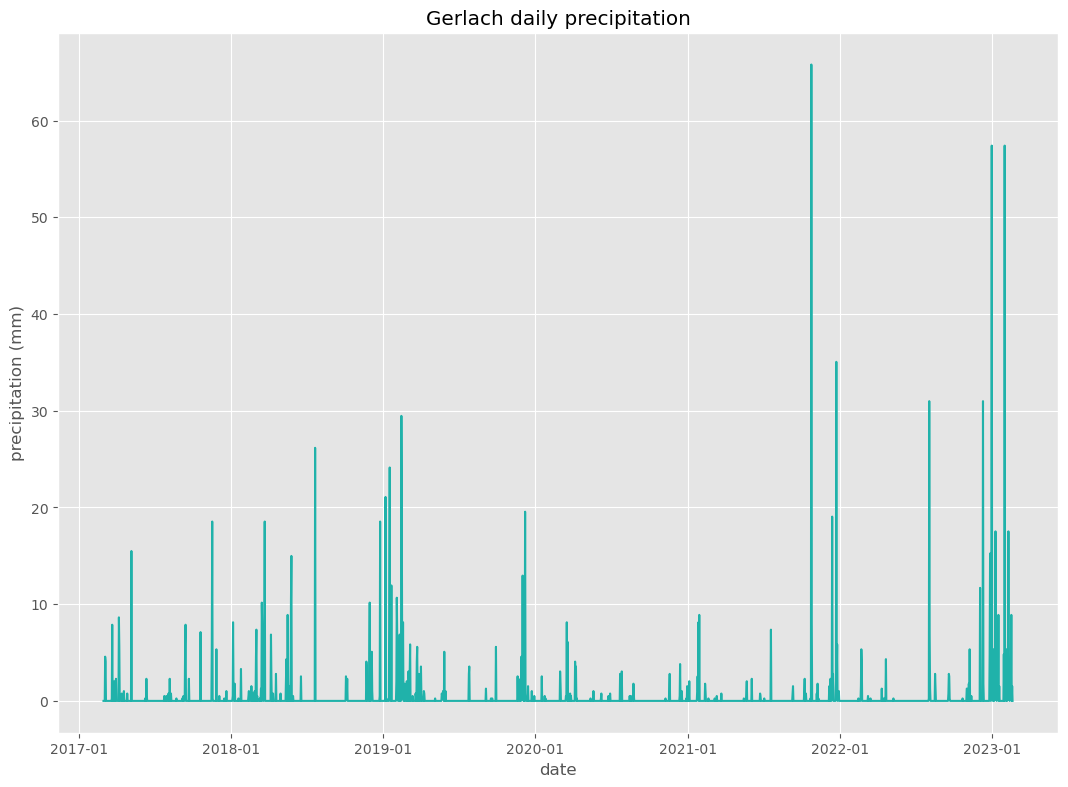

In [32]:
# create a new figure that is 10x7 inches
# which is rendered as 100 pixels per inch
# (matplotlib incorrectly refers to this as dots-per-inch, which is a printer term)
plt.style.use(['ggplot']) # optional: for ggplot-like style
fig = plt.figure(figsize=(10.0, 7.0), dpi=100)

# define axes on the figure to take up the entire figure canvas
ax = fig.add_axes([0, 0, 1, 1])

# plot the rainfall amounts against the axes
ax.plot(df_weather["Date"], df_weather['Precipitation - mm'], color='lightseagreen')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=24))
ax.tick_params(axis='x')

# label the axes and title the plot
ax.set_xlabel('date')
ax.set_ylabel('precipitation (mm)')
ax.set_title('Gerlach daily precipitation')

# save the plot to disk
fig.savefig('daily-precipitation-mm.png', bbox_inches='tight')

In [15]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"])
df_weather.set_index("Date",inplace=True)
gerlach_precip_weekly = df_weather['Precipitation - mm'].resample('W').sum()

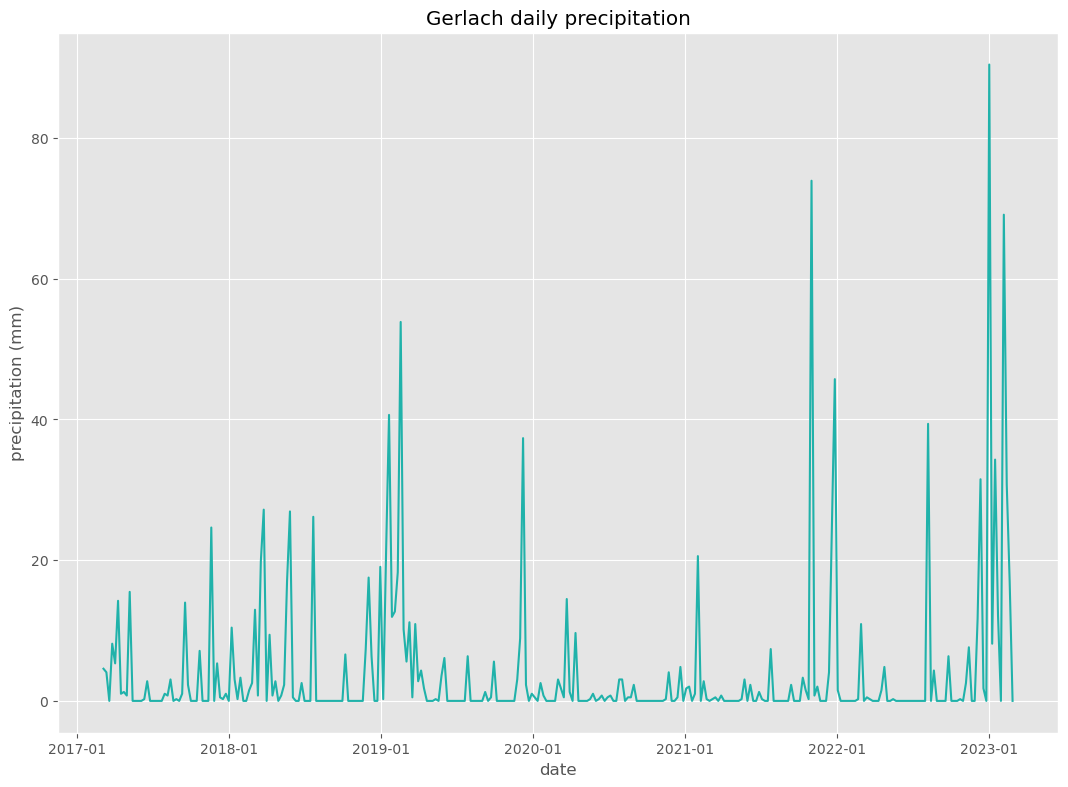

In [16]:
# create a new figure that is 10x7 inches
# which is rendered as 100 pixels per inch
# (matplotlib incorrectly refers to this as dots-per-inch, which is a printer term)
plt.style.use(['ggplot']) # optional: for ggplot-like style
fig = plt.figure(figsize=(10.0, 7.0), dpi=100)

# define axes on the figure to take up the entire figure canvas
ax = fig.add_axes([0, 0, 1, 1])

# plot the rainfall amounts against the axes
ax.plot(gerlach_precip_weekly, color='lightseagreen')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=24))
ax.tick_params(axis='x')

# label the axes and title the plot
ax.set_xlabel('date')
ax.set_ylabel('precipitation (mm)')
ax.set_title('Gerlach daily precipitation')

# save the plot to disk
fig.savefig('weekly-precipitation-mm.png', bbox_inches='tight')

In [174]:
gerlach_precip = df_weather['Precipitation - mm'].copy()

In [175]:
gerlach_precip

Date
2017-03-01    0.000
2017-03-02    0.000
2017-03-03    0.000
2017-03-04    0.000
2017-03-05    4.572
              ...  
2023-02-16    1.778
2023-02-17    8.890
2023-02-18    0.000
2023-02-19    1.524
2023-02-20    0.000
Name: Precipitation - mm, Length: 2182, dtype: float64

NameError: name 'by_year' is not defined

In [159]:
gerlach_precip_peryear

Date,2017,2018,2019,2020,2021,2022,2023
Date,,,,,,,
1,NaN,10.414,0.762,0.000,2.032,0.000,8.128
2,NaN,23.876,22.860,0.000,4.064,0.000,50.546
3,NaN,37.592,85.598,2.540,7.112,0.000,105.156
4,NaN,54.610,160.274,5.842,30.734,0.000,159.766
5,NaN,71.628,247.650,9.144,54.356,0.000,283.464
6,NaN,88.646,353.314,12.446,80.772,0.000,437.896
7,NaN,107.188,512.826,15.748,107.442,0.254,609.346
8,NaN,128.270,682.498,19.050,134.112,11.430,780.796
9,4.572,162.306,857.758,25.400,161.036,22.606,NaN


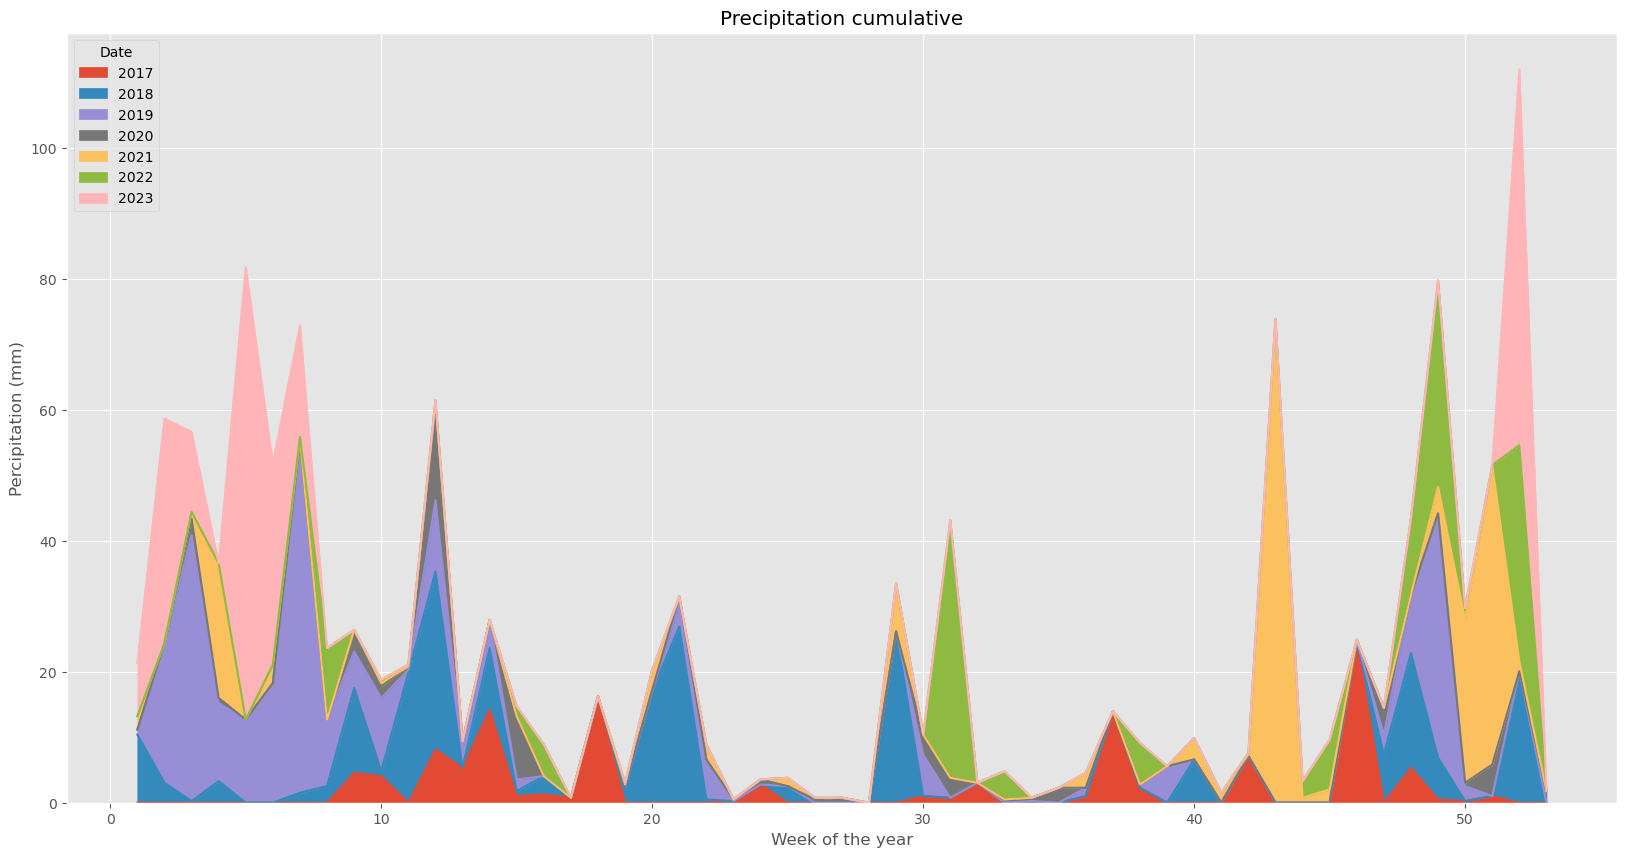

In [144]:
gerlach_precip_peryear.index = gerlach_precip_peryear.index.map(int)
gerlach_precip_peryear.plot(kind='area',
                            stacked=True,
                            figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Precipitation cumulative')
plt.ylabel('Percipitation (mm)')
plt.xlabel('Week of the year')

plt.show()

In [56]:
df_weather = pd.read_excel(r'Gerlach_weather201723.xlsx', header = 0)

In [57]:
df_weather

,Date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation
0,2017-3-1,53,37.0,24,24,19.5,15,71,51.9,27,8,3.5,0,25.9,25.9,25.8,0.00
1,2017-3-2,57,40.7,25,26,22.9,20,81,52.7,27,9,2.1,0,25.9,25.8,25.7,0.00
2,2017-3-3,57,43.0,28,25,17.3,5,79,43.1,14,9,2.7,0,25.8,25.6,25.5,0.00
3,2017-3-4,56,44.5,32,32,19.0,11,79,39.4,18,36,17.1,0,25.4,25.3,25.2,0.00
4,2017-3-5,37,30.8,27,34,24.3,11,96,78.1,42,25,11.7,0,25.4,25.2,25.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2023-2-16,36,33.0,31,32,29.7,27,96,87.7,76,12,4.8,0,25.3,25.1,25.1,0.07
2178,2023-2-17,36,29.1,21,28,21.1,15,92,72.5,54,9,4.1,0,25.6,25.5,25.3,0.35
2179,2023-2-18,37,27.4,17,30,19.4,13,88,72.4,56,20,3.7,0,25.6,25.6,25.4,0.00
2180,2023-2-19,34,30.1,18,31,21.9,12,92,72.6,54,24,10.2,0,25.8,25.6,25.5,0.06


In [58]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [59]:
s1 = pd.Series(df_weather['Precipitation'])
df_weather['Precipitation'] = pd.to_numeric(s1, errors='coerce')
prec_mm = df_weather['Precipitation']*25.4
#gerlach_precip_dailymm = weatherdata['Rain - mm'].resample('D').sum()
df_weather.insert(loc=17, column='Precipitation - mm', value=prec_mm)

In [60]:
df_weather.to_excel('df_weather_percmm.xlsx')

In [175]:
df_weather = pd.read_excel(r'df_weather_percmm.xlsx', header = 0)

In [176]:
df_weather

,Unnamed: 0,Date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Pres_max,Pres_avg,Pres_min,Precipitation,Precipitation - mm
0,0,2017-03-01,53,37.0,24,24,19.5,15,71,51.9,27,8,3.5,0,25.9,25.9,25.8,0.00,0.000
1,1,2017-03-02,57,40.7,25,26,22.9,20,81,52.7,27,9,2.1,0,25.9,25.8,25.7,0.00,0.000
2,2,2017-03-03,57,43.0,28,25,17.3,5,79,43.1,14,9,2.7,0,25.8,25.6,25.5,0.00,0.000
3,3,2017-03-04,56,44.5,32,32,19.0,11,79,39.4,18,36,17.1,0,25.4,25.3,25.2,0.00,0.000
4,4,2017-03-05,37,30.8,27,34,24.3,11,96,78.1,42,25,11.7,0,25.4,25.2,25.2,0.18,4.572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2177,2023-02-16,36,33.0,31,32,29.7,27,96,87.7,76,12,4.8,0,25.3,25.1,25.1,0.07,1.778
2178,2178,2023-02-17,36,29.1,21,28,21.1,15,92,72.5,54,9,4.1,0,25.6,25.5,25.3,0.35,8.890
2179,2179,2023-02-18,37,27.4,17,30,19.4,13,88,72.4,56,20,3.7,0,25.6,25.6,25.4,0.00,0.000
2180,2180,2023-02-19,34,30.1,18,31,21.9,12,92,72.6,54,24,10.2,0,25.8,25.6,25.5,0.06,1.524


In [77]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('df_weather_percmm.xlsx')

# Convert the dates column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the year
df['Year'] = df['Date'].dt.year

# Set the dates column as the index
df.set_index('Date', inplace=True)

# Calculate the cumulative sum per year
df = df.groupby(['Year', pd.Grouper(freq='D')])['Precipitation - mm'].sum().groupby(level=0).cumsum().reset_index()

# Rename the column for the cumulative sum
df = df.rename(columns={'Value': 'Cumulative Sum'})

# Reset the index to the default range index
df.reset_index(drop=True, inplace=True)

# Save the results to a new Excel file
df.to_excel('cumulative_sum_per_day_per_year_n.xlsx', index=False)

In [87]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('df_weather_percmm.xlsx')

# Convert the dates column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the year
df['Year'] = df['Date'].dt.year

# Calculate the cumulative sum per year
df = df.groupby([df['Year'], df['Date'].dt.dayofyear])['Precipitation - mm'].sum().groupby(level=0).cumsum()

# Reset the index and rename columns
df = df.reset_index()
df.columns = ['Year', 'Day of Year', 'Cumulative Sum']

# Pivot the DataFrame to have years in side-by-side columns and day of the year as the index
df = df.pivot(index='Day of Year', columns='Year', values='Cumulative Sum')

# Save the results to a new Excel file
df.to_excel('cumulative_sum_per_day_per_year_reshaped.xlsx')

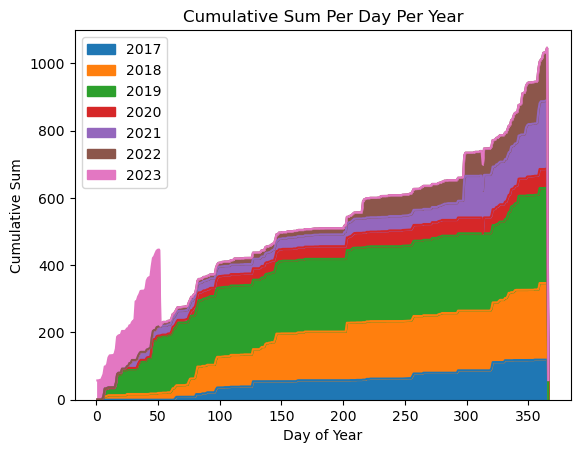

In [88]:
# Load the reshaped DataFrame
df = pd.read_excel('cumulative_sum_per_day_per_year_reshaped.xlsx', index_col=0)

# Create the area plot
df.plot.area()

# Add labels and title
plt.xlabel('Day of Year')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum Per Day Per Year')

# Show the plot
plt.show()

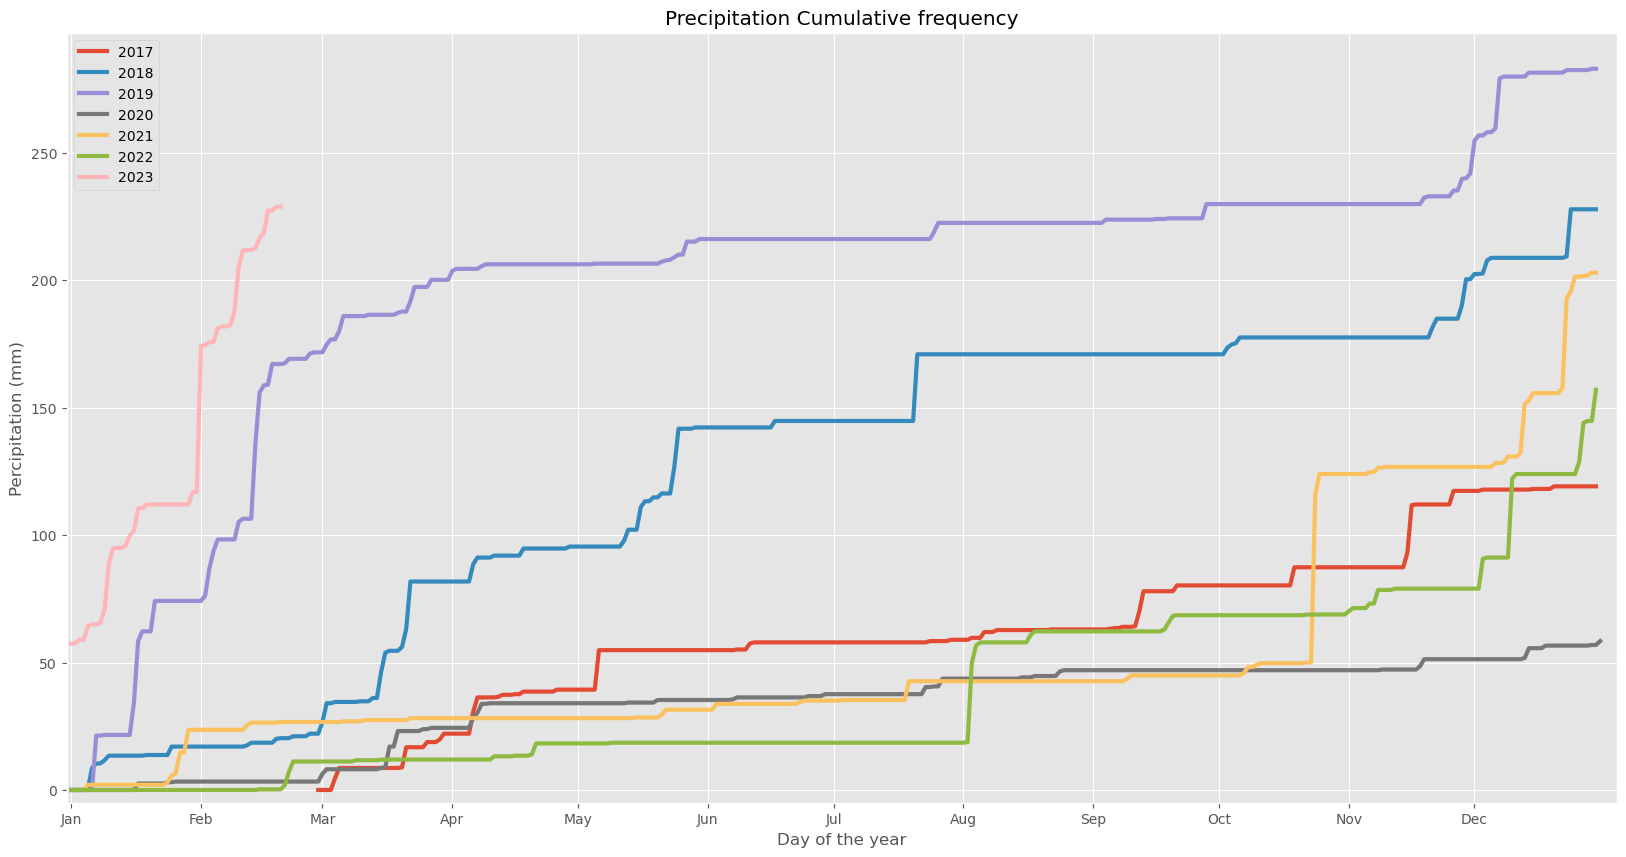

In [172]:
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_excel('cumulative_sum_per_day_per_year_reshaped.xlsx', index_col=0)
plt.style.use('ggplot') 

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df, linewidth = 3, label=['2017','2018','2019','2020','2021','2022','2023'])
ax.set_xlim(xmin=0, xmax=370)
ax.set_ylim(ymin=-5)

# Set the x-axis labels to month names
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
#month_starts = [16,47,77,107,138,168,199,230,260,291,321,351]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

ax.set_title('Precipitation Cumulative frequency')
ax.set_ylabel('Percipitation (mm)')
ax.set_xlabel('Day of the year')
ax.legend(loc='upper left')

plt.show()
# save the plot to disk
fig.savefig('yearly-precipitationcum-mm.png', dpi=300, bbox_inches='tight')

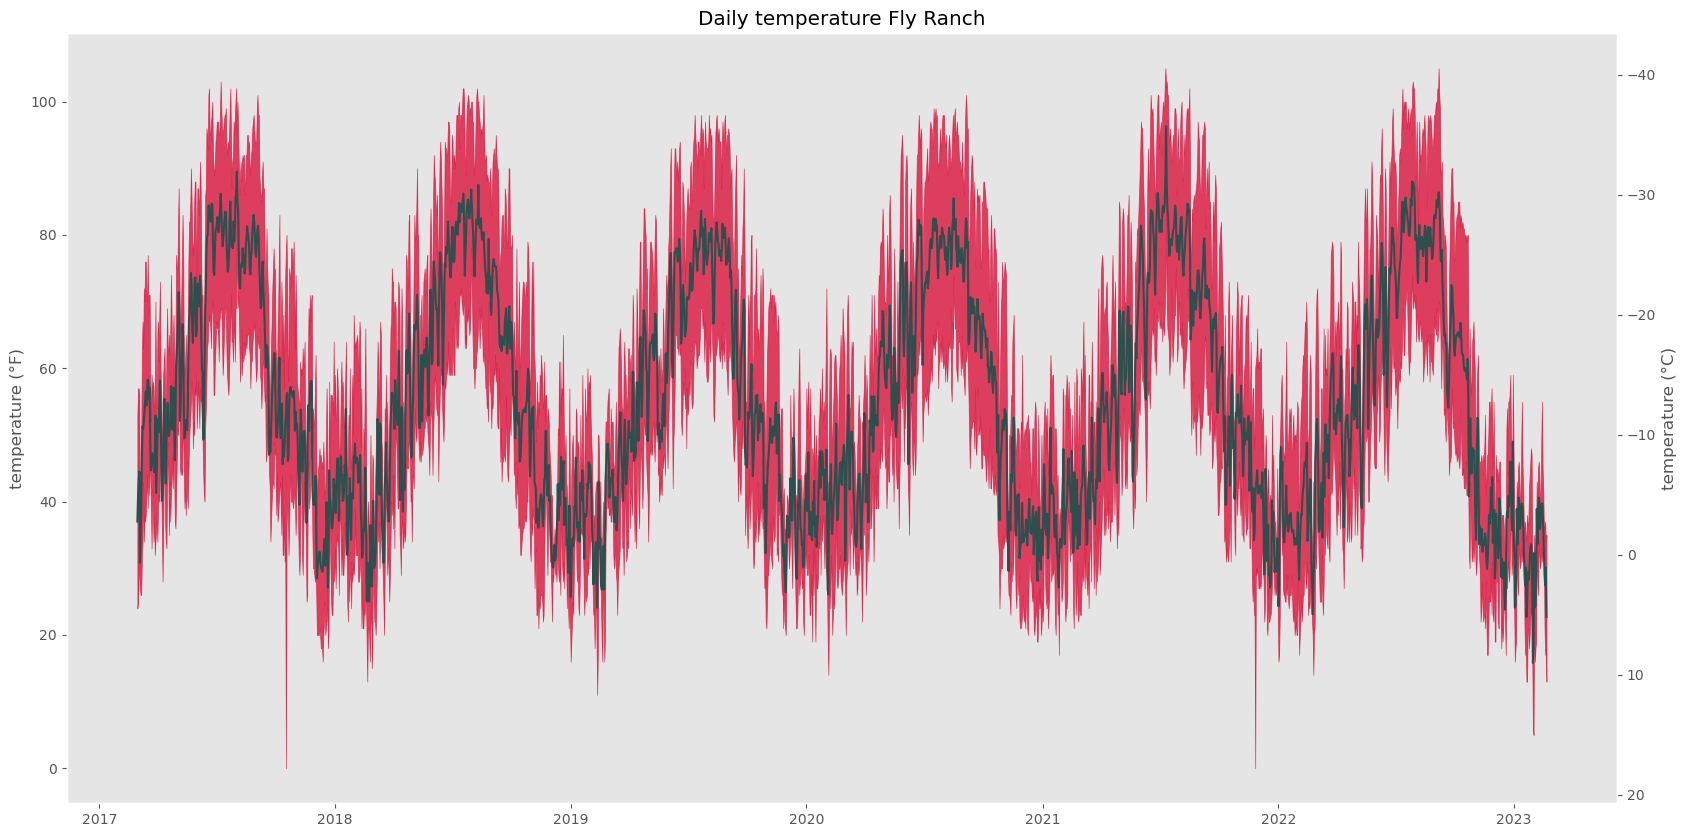

In [48]:
# Load the Excel file into a pandas DataFrame
df_weather = pd.read_excel('df_weather_percmm.xlsx')

# Convert the dates column to datetime format
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

plt.style.use('ggplot') 
fig, ax = plt.subplots(figsize=(20, 10))
temp_avg = df_weather['Temp_avg']

ax.plot(df_weather['Date'], df_weather['Temp_avg'], c='darkslategrey')
plt.fill_between(df_weather['Date'],y1=df_weather['Temp_min'],y2=df_weather['Temp_max'], color='crimson', alpha=0.8)
# label the axes and title the plot

y_lim  = ax.get_ylim()
y2_lim = [(32 - x)*(5/9) for x in y_lim]

ax1 = ax.twinx()
ax1.set_ylim(y2_lim)

ax.set_ylabel('temperature (°F)')
ax1.set_ylabel('temperature (°C)')
ax.grid(False)
ax1.grid(False)

plt.xlabel('Day')
plt.title('Daily temperature Fly Ranch')

# create a new figure that is 10x7 inches
# which is rendered as 100 pixels per inch
# (matplotlib incorrectly refers to this as dots-per-inch, which is a printer term)
#fig3 = plt.figure(figsize=(10.0, 7.0), dpi=100)

# define axes on the figure to take up the entire figure canvas
#ax3 = fig3.add_axes([0, 0, 1, 1])

# plot the rainfall amounts against the axes
#ax3.plot(fly_temp['avg'])
#ax3.plot.fill_between(fly_temp['date'],y1=fly_temp['min'],y2=fly_temp['max'])

#ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax3.tick_params(axis='x')

# label the axes and title the plot
#ax3.set_xlabel('time (per day)')
#ax3.set_ylabel('temperature (celcius)')
#ax3.set_title('Fly Ranch daily temperature')

# save the plot to disk
plt.savefig('Gerlach_temp.png')